# MNIST Keras

### Load Data

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

Using TensorFlow backend.


In [2]:
print(train_images.shape)
print(len(train_labels))
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
len(test_labels)

10000

### Display

uint8


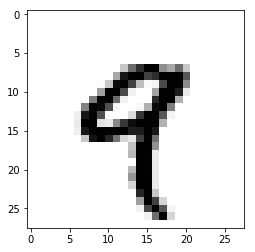

In [4]:
import matplotlib.pyplot as plt

print(train_images.dtype)
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


### Create Network

In [5]:
from keras import models
from keras import layers


network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
network.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Prepare data

In [0]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Train Network

In [9]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2600 - acc: 0.9248
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.1051 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0695 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0506 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0386 - acc: 0.9882


### Evaluate network

In [10]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)


10000/10000 [==============================] - 1s 53us/step
test_acc 0.9788


In [26]:
import numpy as np
#predict = network.predict(  np.array( [ test_images[4], ] ) )
x = test_images[4]
x = np.expand_dims(x, axis=0)
predict = network.predict(x)[0]

bestclass = ''
bestconf = -1
for n in [0,1,2,3,4,5,6,7,8,9]:
	if (predict[n] > bestconf):
		bestclass = str(n)
		bestconf = predict[n]
    
print("Label", test_labels[4])
print ('I think this digit is a ' + bestclass + ' with ' + str(bestconf * 100) + '% confidence.')

Label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
I think this digit is a 4 with 99.9305009841919% confidence.
